# MultiPlots

MultiPlots are plots that ...

- ... combine multiple layers of different `seaborn` plotting functions
- ... use a set of parameters that are optimized for that plotting combination
- ... allow for customization of each layer using `seaborn` and `matplotlib` keywords


### Get Example Data

In [1]:
import plotastic as plst

# Load Example Data
DF, _dims = plst.load_dataset("fmri", verbose=False)

DF.head()

,Unnamed: 0,subject,timepoint,event,region,signal
0,17,s7,9,stim,parietal,0.058897
1,36,s8,9,stim,parietal,0.170227
2,67,s0,0,stim,frontal,-0.021452
3,84,s1,0,stim,parietal,-0.064454
4,127,s13,9,stim,parietal,0.013245


In [2]:
# Define Dimensions explicitly
dims = dict(
    y="signal",
    x="timepoint",
    hue="event",
    col="region",
)

# Initialise DataAnalysis Object
DA = plst.DataAnalysis(
    data=DF,  # Dataframe
    dims=dims,  # Dictionary with y, x, hue, col, row
    subject="subject",  # Data is paired by subject (optional)
    verbose=True,  # Print out Info about the Data
)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (40 total) have the same samplesize n = 14.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['region', 'event'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


## Set matplotlib style

In [3]:
# plst.set_style("default")

# Examples

And how to edit what's inside the axes


## Boxplot + Stripplot: `.plot_box_strip()`
Individual Points may overlap, hence the default uses lower alpha values
and a white edgecolor.

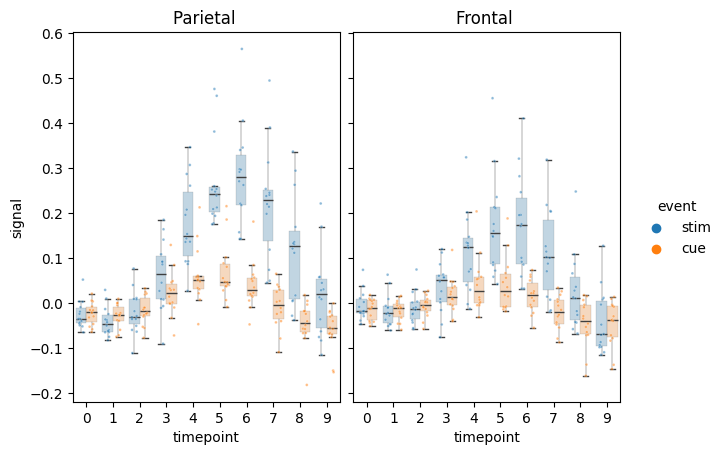

In [4]:
DA.plot_box_strip()  # Default Settings

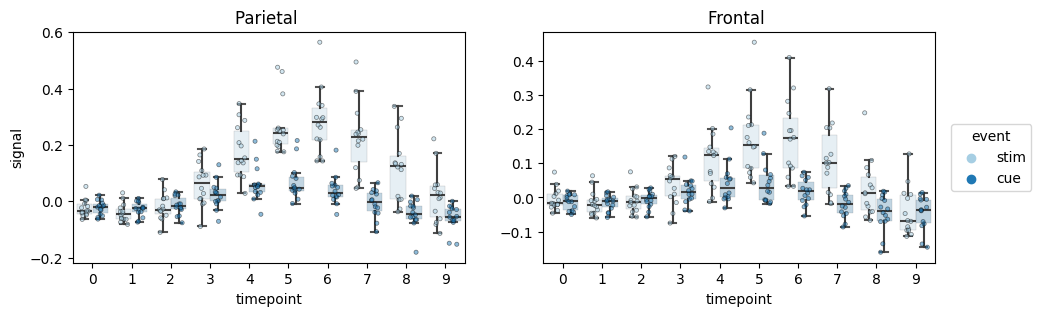

In [8]:
# Customized:
DA.plot_box_strip(
    ### General keywords for faster access
    marker_size=0.9,  # Size of the stripplot markers
    marker_alpha=0.9,  # Alpha of the stripplot markers
    legend=True,
    ### Subplot keywords:
    subplot_kws=dict(
        figsize=(10, 3),  # Figure size
        sharey=False,  # Each Axes scales y-axis individually
        wspace=0.2,  # Horizontal space between subplots
    ),
    ### Boxplot keywords:
    box_kws=dict(
        palette="Paired",
        showfliers=False,
        # Use boxprops, whiskerprops, capprops, and flierprops
        capprops=dict(  # Caps at the end of whiskers
            alpha=0.9,
            # zorder=200,  # front, mid, background, hidden = 100, 50, 1, -1
            linewidth=1.5,
        ),
        whiskerprops=dict(
            linewidth=1.5,
        ),
        medianprops=dict(
            # zorder=200,
        ),
    ),
    ### Stripplot Keywords
    strip_kws=dict(
        palette="Paired",
        dodge=True,  # Separates the points in hue
        jitter=0.2,  # How far datapoints of one group scatter across the x-axis
        zorder=100,
        ### Marker Style
        size=3,  # Overwrite marker_size
        alpha=0.5,  # Overwrite marker_alpha
        edgecolor="black",
        linewidth=0.5,  # Edge width of the marker
    ),
    ### Legend Keywords
    legend_kws=dict(frameon=True),
)

## Boxplot + Swarmplot: `.plot_box_swarm()`

Swarmplot makes sure that the points don't overlap. Hence, pointsize is smaller by default


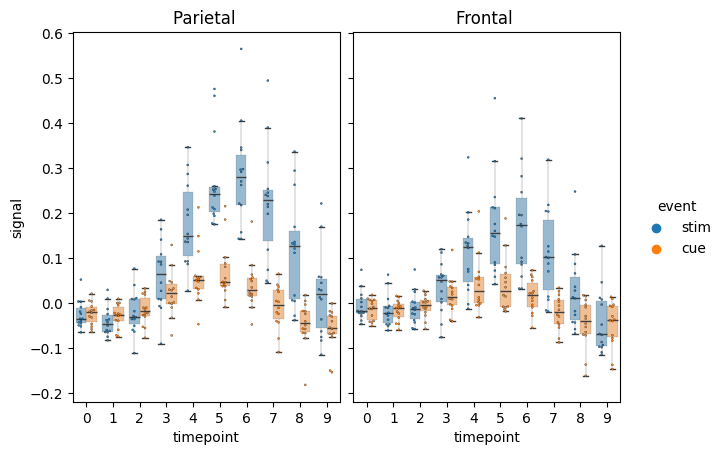

In [6]:
DA.plot_box_swarm()  # Default Settings

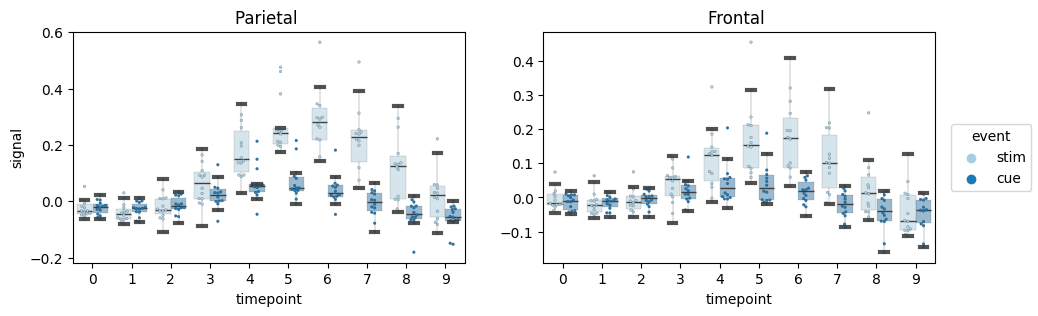

In [11]:
# Customized:
DA.plot_box_swarm(
    ### General keywords for faster access
    marker_size=0.9,  # Size of the stripplot markers
    marker_alpha=0.5,  # Alpha of the stripplot markers
    legend=True,
    ### Subplot keywords:
    subplot_kws=dict(
        figsize=(10, 3),  # Figure size
        sharey=False,  # Each Axes scales y-axis individually
        wspace=0.2,  # Horizontal space between subplots
    ),
    ### Boxplot keywords:
    box_kws=dict(
        palette="Paired",
        showfliers=False,
        # Use boxprops, whiskerprops, capprops, and flierprops
        capprops=dict(  #' Caps at the end of whiskers
            alpha=0.9,
            zorder=200,
            linewidth=3,
        ),
    ),
    ### Stripplot Keywords
    swarm_kws=dict(
        palette="Paired",
        dodge=True,  # Separates the points in hue
        zorder=100,
        ### Marker Style
        size=2,  # Overwrite marker_size
        alpha=1,  # Overwrite marker_alpha
        edgecolor="black",
        linewidth=0.1,  # Edge width of the marker
    ),
    ### Legend Keywords
    legend_kws=dict(frameon=True),
)